In [7]:
import os
import cv2
import numpy as np
from tqdm import tqdm



In [17]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|          | 107/12501 [00:00<00:11, 1062.26it/s]

PetImages/Cat


  1%|          | 95/12501 [00:00<00:13, 942.80it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:11<00:00, 1092.04it/s]


Cats: 12476
Dogs: 12470


In [20]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [21]:
print(len(training_data))

24946


In [22]:
print(training_data[0])

[array([[177,  89, 185, ...,  57,  25,  65],
       [177,  96, 186, ...,  63,  26,  65],
       [178,  94, 187, ...,  49,  26,  67],
       ...,
       [ 45, 178,  77, ..., 162, 135, 116],
       [ 39, 142,  74, ..., 179, 140, 149],
       [ 37,  49,  75, ...,  47, 120, 120]], dtype=uint8)
 array([0., 1.])]


In [23]:
import matplotlib.pyplot as plt

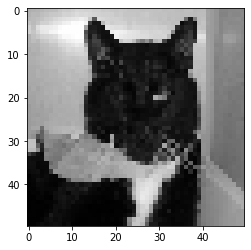

In [25]:
plt.imshow(training_data[1][0], cmap="gray")